In [13]:
import torch

In [14]:
import torch

# 참의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 참의 게수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

In [15]:
# 경사 하강법으로 파라미터를 최적화함

# 손실 함수의 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사 값을 초기화
    w.grad = None

    # 선형 모델으로 y 예측 값을 계산
    y_pred = torch.mv(X, w)

    # MSE loss와 w에 의한 미분을 계산
    loss = torch.mean((y - y_pred)**2)
    loss.backward()

    # 경사를 갱신한다
    # w를 그대로 대입해서 갱신하면 다른 Tensor가 돼서
    # 계산 그래프가 망가진다. 따라서 data만 갱신한다
    w.data = w.data - gamma * w.grad.data

    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

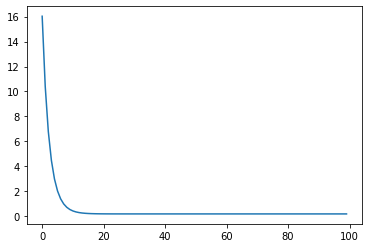

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [17]:
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

# iris는 (0,1,2)의 세 개 클래스를 분류하는 문제이므로
# (0,1)의 두 개 클래스 데이터만 사용한다
# 원래는 교육용과 테스트용으로 나누어야 하지만 여기선 생략한다
X = iris.data[:100]
y = iris.target[:100]

# NumPy의 ndarray를 PyTorch의 Tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [18]:
w

tensor([0.9961, 2.0450, 2.9749], requires_grad=True)

##### PyTorch : nn
 연산 그래프와 자동미분은 복잡한 연산을 정의하고 자동으로 미분을 하기 위한 강력한 패러다임입니다.

---------------------------------------------------------------------------------------------------------------
##### PyTorch: optim
지금까지는 torch.no_grad() 로 학습 가능한 매개변수를 갖는 텐서들을 직접 조작하여 모델의 가중치(weight)를 갱신하였습니다. 이것은 확률적 경사하강법(SGD; stochastic gradient descent)와 같은 간단한 최적화 알고리즘에서는 크게 부담이 되지 않지만, 실제로 신경망을 학습할 때는 AdaGrad, RMSProp, Adam 등과 같은 더 정교한 옵티마이저(optimizer)를 사용하곤 합니다.

In [29]:
import torch

# 참의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 참의 게수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

#### 최적화 루프

In [30]:
# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
     # 전회의 backward 메서드로 계산된 경사 값을 초기화
    optimizer.zero_grad()

    # 선형 모델으로 y 예측 값을 계산
    y_pred = net(X)

    # MSE loss 계산
    # y_pred는 (n,1)과 같은 shape를 지니고 있으므로 (n,)으로 변경할 필요가 있다
    loss = loss_fn(y_pred.view_as(y), y)

    # loss의 w를 사용한 미분 계산
    loss.backward()

    # 경사를 갱신한다
    optimizer.step()

    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

In [31]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9856, 1.9051, 3.0160]], requires_grad=True)]

In [32]:
from torch import nn, optim

# Linear층을 작성. 이번에는 절편은 회귀 계수에 포함하므로
# 입력 차원을 3으로 하고 bias(절편)을 False로 한다
net = nn.Linear(in_features=3, out_features=1, bias=False)

# SGD의 optimizer상에서 정의한 네트워크의
# 파라미터를 전달해서 초기화
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE loss클래스
loss_fn = nn.MSELoss()

## iris 데이터에 적용

In [33]:
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

# iris는 (0,1,2)의 세 개 클래스를 분류하는 문제이므로
# (0,1)의 두 개 클래스 데이터만 사용한다
# 원래는 교육용과 테스트용으로 나누어야 하지만 여기선 생략한다
X = iris.data[:100]
y = iris.target[:100]

# NumPy의 ndarray를 PyTorch의 Tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [34]:
# iris 데이터는 4차원
net = nn.Linear(4, 1)

# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한
# 크로스 엔트로비를 계산
loss_fn = nn.BCEWithLogitsLoss()

# SGD(약간 큰 학습률)
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [35]:
# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
     # 전회의 backward 메서드로 계산된 경사 값을 초기화
    optimizer.zero_grad()

    # 선형 모델으로 y 예측 값을 계산
    y_pred = net(X)

    # MSE loss 미분 계산
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()

    # 경사를 갱신한다
    optimizer.step()

    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

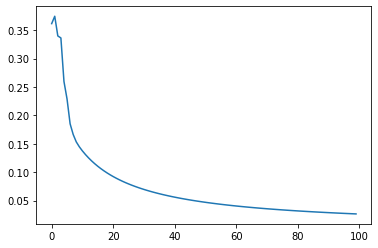

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [37]:
# 선형 결합의 결과
h = net(X)

# 시그모이드 함수를 적용한 결과는 y=1의 확률을 보여준다
prob = nn.functional.sigmoid(h)

# 확률이 0.5이상인 것을 클래스1로 예측하고 그외는 0으로 한다
# PyTorch에는 Bool형이 없으므로 ByteTensor가 출력된다.
y_pred = prob > 0.5

# 예측 결과 확인 (yはFloatTensor이므로 ByteTensor로
# 로 변환한 후에 비교）
(y.byte() == y_pred.view_as(y)).sum().item()

/Users/aidev_yyc_mac/opt/anaconda3/envs/mario/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


100